In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from pathlib import Path
from ratansunpy.client import ARClient
from ratansunpy.time import TimeRange

from src.utils import (filter_by_ar_num,
                       count_freqs_per_fit,
                       plot_evolution_curves,
                       preprocess_flare_data,
                       create_flares_raw_dict, 
                       reduce_flares_to_daily_representative)

import logging
logging.getLogger('matplotlib.category').setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

/home/ihb-minion003/Projects/RARPs_study/venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


AREAS OF INTEREST:
- NOAA12192 2014.10.21-2014.10.29
- NOAA12371 2015.06.18-2015.06.25

### Data preparation

In [2]:
# download extracted AR (widnow size 50) from SAO server
ROOT_DIR = Path().resolve().parent
AR_TIMERANGE = TimeRange('2009-01-01', '2025-03-22')
AR = ["12192", "12371"]

ar_client = ARClient()
ar_urls = ar_client.acquire_data(timerange=AR_TIMERANGE, ar_nums=AR, cache=True)

In [3]:
ar_urls

[]

In [4]:
local_ar_paths = ar_client.download_data(timerange=AR_TIMERANGE, ar_nums=AR, cache=True, 
                                         save_to=os.path.join(ROOT_DIR, 'data', f'AR{AR[0]}_{AR[1]}'))

In [4]:
# create lists of paths for each AR of interests
ar2371 = filter_by_ar_num(local_ar_paths, ar_num="2371")
ar2192 = filter_by_ar_num(local_ar_paths, ar_num="2192")

print("Total number of records")
print(f"AR 2371 : {len(ar2371)}")
print(f"AR 2192 : {len(ar2192)}")

print("\n")

# delete paths to fits with <70 frequencies
ar2192_freq_count = count_freqs_per_fit(ar2192, ar_num="ar2192", show_summary=False)
ar2371_freq_count = count_freqs_per_fit(ar2371, ar_num="ar2371", show_summary=False)

ar2192 = [path for path in ar2192_freq_count if ar2192_freq_count[path] >= 70]
ar2371 = [path for path in ar2371_freq_count if ar2371_freq_count[path] >= 70]

print("Records with >70 frequencies")
print(f"AR 2371 : {len(ar2371)}")
print(f"AR 2192 : {len(ar2192)}")


Total number of records
AR 2371 : 323
AR 2192 : 39


Records with >70 frequencies
AR 2371 : 319
AR 2192 : 37


In [5]:
# collect flare events in the next 24 hours for each record (daily)

# if there are multiple records during the day 
# --> 
# one record is parsed ~in the middle of timeline between earliest and latest records for that day

ar2371_flares = reduce_flares_to_daily_representative(
    preprocess_flare_data(
        create_flares_raw_dict(os.path.join(ROOT_DIR, "data", "events", "events_history.csv"), ar2371, column_name="day")))

ar2192_flares = reduce_flares_to_daily_representative(
    preprocess_flare_data(
        create_flares_raw_dict(os.path.join(ROOT_DIR, "data", "events", "events_history.csv"), ar2192, column_name="day")))

print(f"============= ar2371_flares =============")
print(*ar2371_flares.items(), sep="\n")
print("\n")
print(f"============= ar2192_flares =============")
print(*ar2192_flares.items(), sep="\n")

============= ar2371_flares =============
('Jun 2015 25 09:16', {'C': 1.7e-06})
('Jun 2015 28 09:16', {'C': 2.2e-06})
('Jun 2015 23 09:15', {'C': 1.9e-06})
('Jun 2015 24 09:15', {'C': 5.6e-06, 'M': 7.9e-05})
('Jun 2015 26 11:10', {'C': 1.4e-06})
('Jun 2015 27 08:59', {'C': 1.4e-06})
('Jun 2015 22 09:15', {'C': 3.9e-06, 'M': 6.5e-05})
('Jun 2015 17 09:14', {'C': 2.8e-06})
('Jun 2015 18 09:14', {'C': 3.5e-06, 'M': 3e-05})
('Jun 2015 20 09:15', {'M': 2.7e-05})
('Jun 2015 21 09:06', {'C': 3.2e-06})
('Jun 2015 19 09:06', {'C': 8.1e-06, 'M': 1e-05})


============= ar2192_flares =============
('Oct 2014 28 07:43', {'C': 8.4e-06, 'M': 1.6e-05})
('Oct 2014 30 09:22', {'C': 9.7e-06})
('Oct 2014 27 08:32', {'M': 6.7e-05, 'X': 0.0002, 'C': 6.5e-06})
('Oct 2014 21 08:58', {'C': 6.5e-06, 'M': 8.7e-05})
('Oct 2014 24 08:57', {'C': 9.2e-06, 'X': 0.00031})
('Oct 2014 23 08:57', {'M': 4e-05, 'C': 5.9e-06})
('Oct 2014 29 08:24', {'M': 3.5e-05, 'C': 7.1e-06})
('Oct 2014 22 08:58', {'X': 0.00016, 'C': 3.7

### Evolution curves for AR 2192:

#### Available frequencies (total 70):

* Index 0: 1.09 MHz
* Index 1: 1.14 MHz
* Index 2: 1.31 MHz
* Index 3: 1.49 MHz
* Index 4: 1.55 MHz
* Index 5: 1.62 MHz
* Index 6: 3.00 MHz
* Index 7: 3.18 MHz
* Index 8: 3.37 MHz
* Index 9: 3.57 MHz
* Index 10: 3.75 MHz
* Index 11: 4.00 MHz
* Index 12: 4.20 MHz
* Index 13: 4.40 MHz
* Index 14: 4.50 MHz
* Index 15: 4.70 MHz
* Index 16: 4.90 MHz
* Index 17: 5.10 MHz
* Index 18: 5.30 MHz
* Index 19: 5.50 MHz
* Index 20: 5.70 MHz
* Index 21: 6.00 MHz
* Index 22: 6.15 MHz
* Index 23: 6.30 MHz
* Index 24: 6.65 MHz
* Index 25: 6.80 MHz
* Index 26: 6.95 MHz
* Index 27: 7.10 MHz
* Index 28: 7.30 MHz
* Index 29: 7.60 MHz
* Index 30: 7.75 MHz
* Index 31: 7.90 MHz
* Index 32: 8.10 MHz
* Index 33: 8.25 MHz
* Index 34: 8.40 MHz
* Index 35: 8.70 MHz
* Index 36: 8.90 MHz
* Index 37: 9.05 MHz
* Index 38: 9.20 MHz
* Index 39: 9.35 MHz
* Index 40: 9.50 MHz
* Index 41: 9.70 MHz
* Index 42: 10.00 MHz
* Index 43: 10.15 MHz
* Index 44: 10.30 MHz
* Index 45: 10.50 MHz
* Index 46: 10.60 MHz
* Index 47: 10.80 MHz
* Index 48: 10.90 MHz
* Index 49: 11.30 MHz
* Index 50: 11.40 MHz
* Index 51: 11.60 MHz
* Index 52: 11.70 MHz
* Index 53: 11.90 MHz
* Index 54: 12.20 MHz
* Index 55: 12.40 MHz
* Index 56: 12.50 MHz
* Index 57: 12.70 MHz
* Index 58: 12.90 MHz
* Index 59: 13.05 MHz
* Index 60: 13.35 MHz
* Index 61: 13.50 MHz
* Index 62: 13.70 MHz
* Index 63: 14.00 MHz
* Index 64: 14.15 MHz
* Index 65: 14.30 MHz
* Index 66: 14.50 MHz
* Index 67: 14.60 MHz
* Index 68: 15.00 MHz
* Index 69: 15.30 MHz
* Index 70: 15.45 MHz

#### Intensity:

In [6]:
#plot_evolution_curves(ar2192, ar_number='2192',  flare_counts = ar2192_flares,  freq_indices=[6, 10, 39, 42], channel=0,  cmap_grayscale=True)

#### Polarization:

In [7]:
#plot_evolution_curves(ar2192, ar_number='2192',  flare_counts = ar2192_flares, freq_indices=[6, 10, 39, 42],  channel=1,  cmap_grayscale=True)

### Evolution curves for AR 2371:

#### Available frequencies (total 70):

* Index 0: 0.80 MHz
* Index 1: 1.04 MHz
* Index 2: 1.09 MHz
* Index 3: 1.14 MHz
* Index 4: 1.19 MHz
* Index 5: 1.25 MHz
* Index 6: 1.31 MHz
* Index 7: 1.49 MHz
* Index 8: 1.55 MHz
* Index 9: 1.62 MHz
* Index 10: 1.69 MHz
* Index 11: 2.14 MHz
* Index 12: 2.30 MHz
* Index 13: 2.39 MHz
* Index 14: 2.67 MHz
* Index 15: 2.77 MHz
* Index 16: 3.00 MHz
* Index 17: 3.18 MHz
* Index 18: 3.37 MHz
* Index 19: 3.57 MHz
* Index 20: 3.75 MHz
* Index 21: 4.00 MHz
* Index 22: 4.20 MHz
* Index 23: 4.40 MHz
* Index 24: 4.50 MHz
* Index 25: 4.70 MHz
* Index 26: 4.90 MHz
* Index 27: 5.10 MHz
* Index 28: 5.30 MHz
* Index 29: 5.50 MHz
* Index 30: 5.70 MHz
* Index 31: 6.00 MHz
* Index 32: 6.15 MHz
* Index 33: 6.30 MHz
* Index 34: 6.65 MHz
* Index 35: 6.80 MHz
* Index 36: 6.95 MHz
* Index 37: 7.10 MHz
* Index 38: 7.30 MHz
* Index 39: 7.60 MHz
* Index 40: 7.75 MHz
* Index 41: 7.90 MHz
* Index 42: 8.10 MHz
* Index 43: 8.25 MHz
* Index 44: 8.40 MHz
* Index 45: 8.70 MHz
* Index 46: 8.90 MHz
* Index 47: 9.05 MHz
* Index 48: 9.20 MHz
* Index 49: 9.35 MHz
* Index 50: 9.50 MHz
* Index 51: 9.70 MHz
* Index 52: 10.00 MHz
* Index 53: 10.15 MHz
* Index 54: 10.30 MHz
* Index 55: 10.50 MHz
* Index 56: 10.60 MHz
* Index 57: 10.80 MHz
* Index 58: 10.90 MHz
* Index 59: 11.30 MHz
* Index 60: 11.40 MHz
* Index 61: 11.60 MHz
* Index 62: 11.70 MHz
* Index 63: 11.90 MHz
* Index 64: 12.20 MHz
* Index 65: 12.40 MHz
* Index 66: 12.50 MHz
* Index 67: 12.70 MHz
* Index 68: 12.90 MHz
* Index 69: 13.05 MHz
* Index 70: 13.35 MHz


#### Intensity:

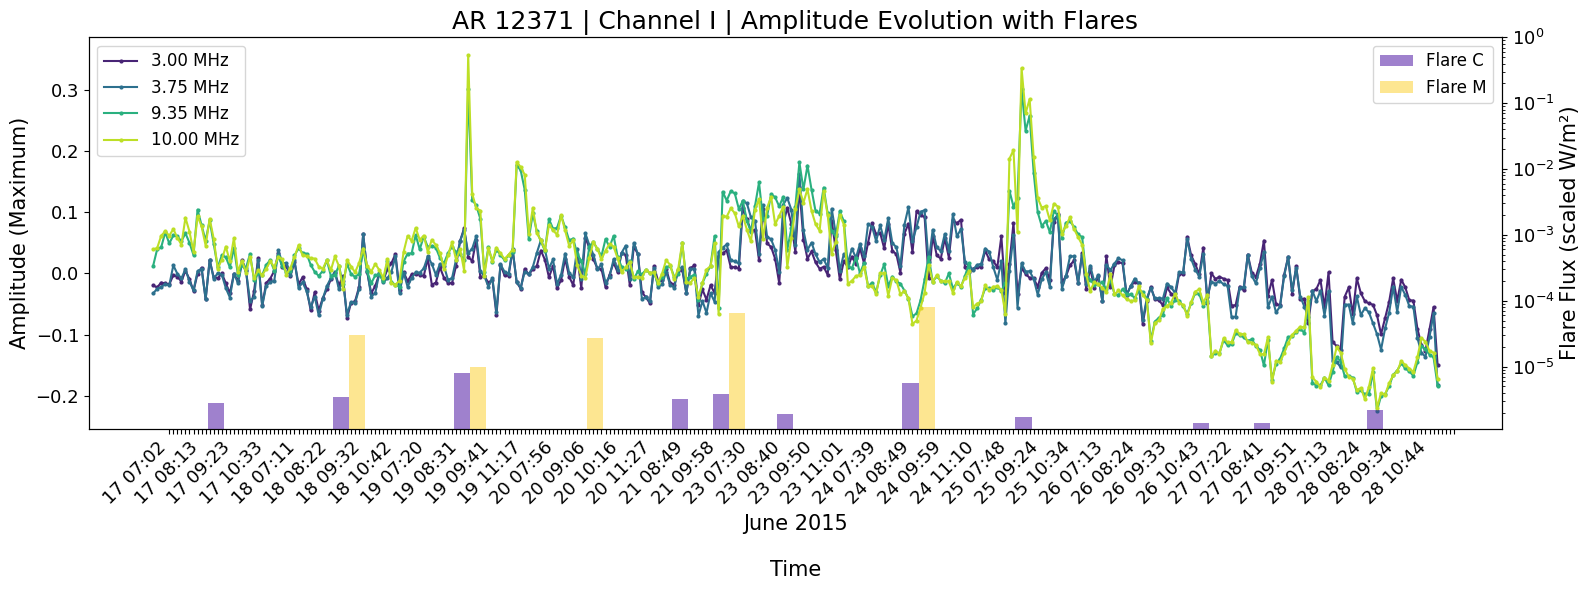

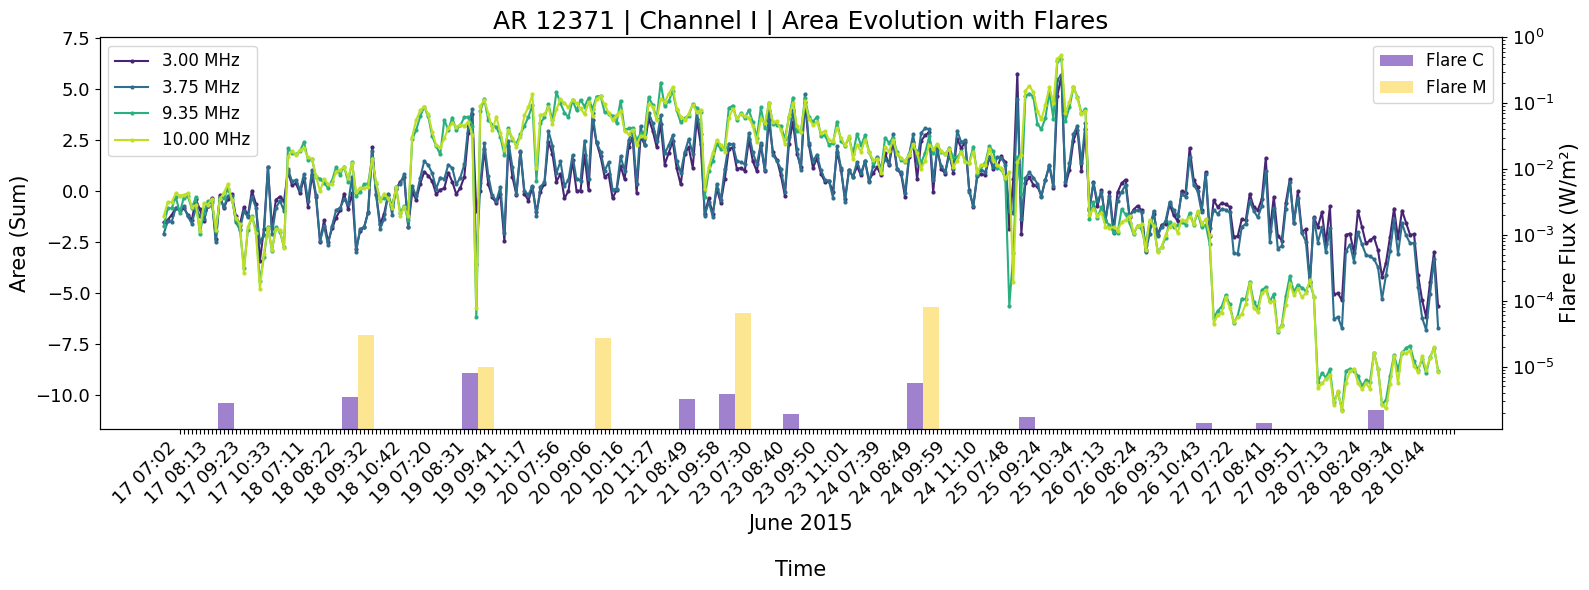

In [8]:
plot_evolution_curves(ar2371, ar_number='12371', flare_counts=ar2371_flares, freq_indices=[16, 20, 49, 52], bars_width=4, channel=0, denoise=True)

#### Polarization:

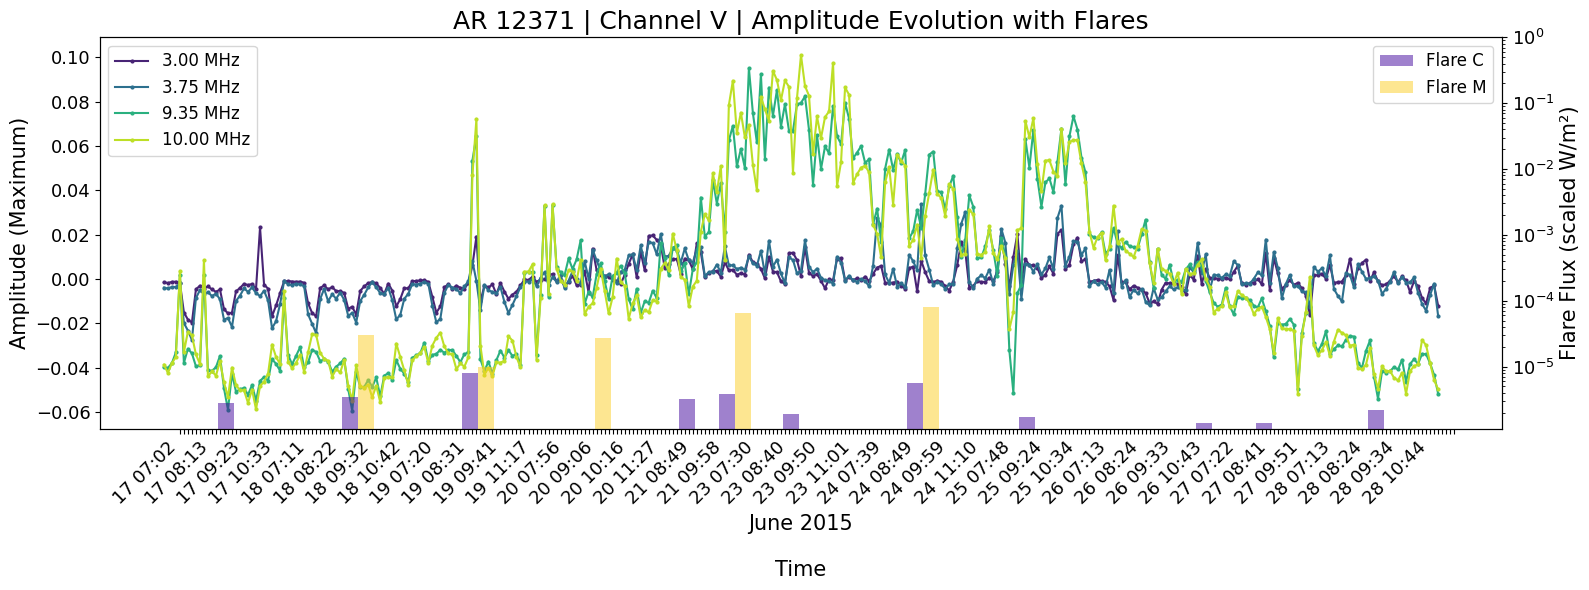

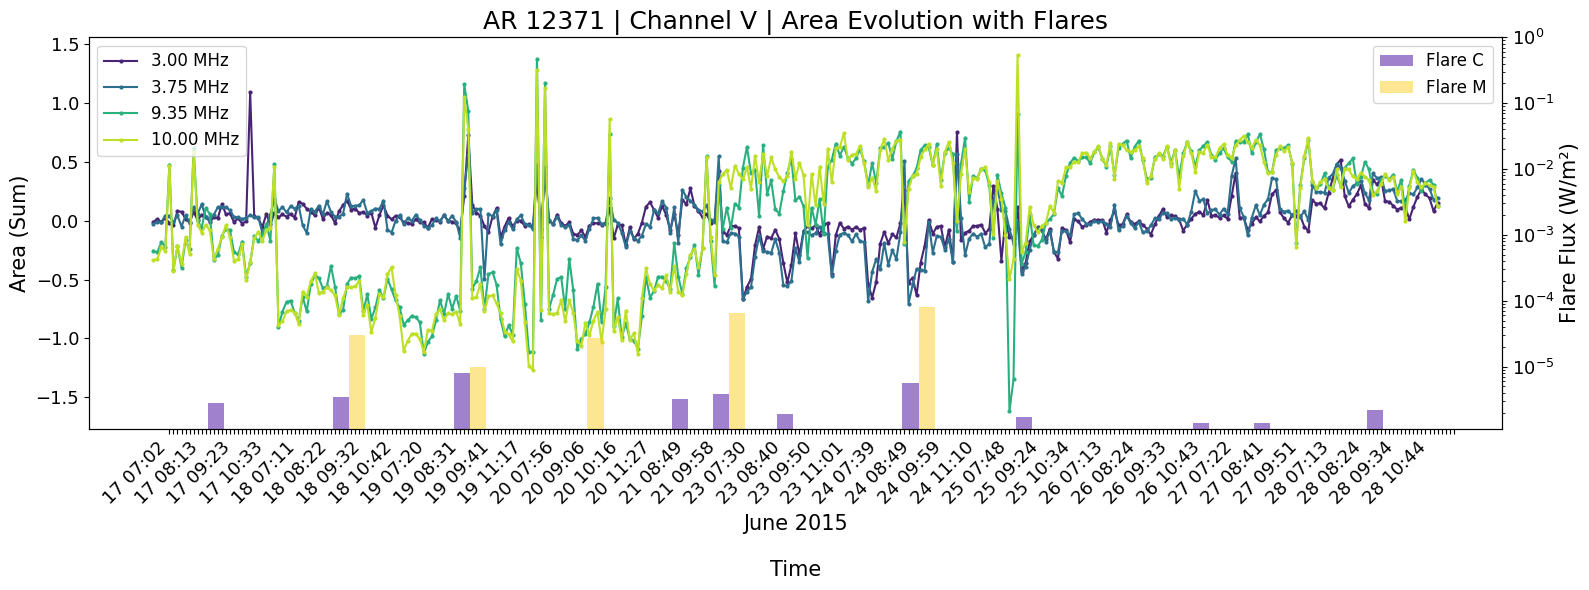

In [9]:
plot_evolution_curves(ar2371, ar_number='12371', flare_counts=ar2371_flares, bars_width=4, freq_indices=[16, 20, 49, 52], channel=1, denoise=True)